# 0.0 IMPORTS

In [1]:
import pandas as pd
import sys
sys.path.append('../../projeto/src')
from utils import utils
my_utils = utils.Utils()
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


## 0.1 Data Load

In [155]:
config_file = my_utils.load_config_file('../../config/config.yaml')
columns_to_use = config_file['columns_to_use']


In [156]:
df_raw = pd.read_parquet('../../projeto/data/featured/data_featured.parquet', columns=columns_to_use)

In [157]:
df_raw.head()

,SK_ID_CURR,TARGET,ORGANIZATION_TYPE,EXT_SOURCE_3,DAYS_TO_END_B,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_SINCE_ENDED_B,DPD_INSTALLMENTS,AMT_GOODS_PRICE,...,AVG_AMOUNT_ANNUITY_PA,FRAC_PAID_INSTALLMENTS,DAYS_EMPLOYED,SK_PREV_POS,DAYS_LAST_PHONE_CHANGE,PREV_CRED_INSTALLMENTS,MAX_AMT_CREDIT_PA,CREDIT_TYPE_COUNT_B,AMT_ANNUITY,AMT_CREDIT
0,100002,1,Business Entity Type 3,0.139376,62.0,0.262949,0.083037,-967.0,-20.421053,351000.0,...,9251.775,1.000000,-637,19.0,-1134.0,19.0,179055.0,8.0,24700.5,406597.5
1,100003,0,School,NaN,1216.0,0.622246,0.311267,-621.0,-7.160000,1129500.0,...,56553.990,1.000000,-1188,28.0,-828.0,25.0,1035882.0,4.0,35698.5,1293502.5
2,100004,0,Government,0.729567,-382.0,0.555912,NaN,-382.0,-7.666667,135000.0,...,5357.250,1.000000,-225,4.0,-815.0,3.0,20106.0,2.0,6750.0,135000.0
3,100006,0,Business Entity Type 3,NaN,NaN,0.650442,NaN,NaN,-19.375000,297000.0,...,23651.175,1.000000,-3039,21.0,-617.0,16.0,906615.0,NaN,29686.5,312682.5
4,100007,0,Religion,NaN,-783.0,0.322738,NaN,-783.0,-3.636364,513000.0,...,12278.805,0.954545,-3038,66.0,-1106.0,66.0,284400.0,1.0,21865.5,513000.0


# 1.0 DATA DESCRIPTION

In [158]:
df1 = df_raw.copy()

In [159]:
# Print Data Shape
print(f'Data Shape: {df1.shape}')
print('------------------------------------ \n')

# Print Data Types
print(f'Data Types:')
display(df1.dtypes)
print('------------------------------------ \n')

# Print Data Head
print(f'Data Head:')
display(df1.head())
print('------------------------------------ \n')

# Print Data NaNs Percentage
print(f'Data NaNs:')
display(df1.isna().mean().sort_values(ascending=False))
print('------------------------------------ \n')

# Print Data Describe   
print(f'Data Describe:')
display(df1.describe().T)
print('------------------------------------ \n')

Data Shape: (307511, 24)
------------------------------------ 

Data Types:


SK_ID_CURR                  int64
TARGET                      int64
ORGANIZATION_TYPE          object
EXT_SOURCE_3              float64
DAYS_TO_END_B             float64
EXT_SOURCE_2              float64
EXT_SOURCE_1              float64
DAYS_SINCE_ENDED_B        float64
DPD_INSTALLMENTS          float64
AMT_GOODS_PRICE           float64
ACCEPTED_CREDICT_PA       float64
DAYS_BIRTH                  int64
DAYS_ID_PUBLISH             int64
DAYS_REGISTRATION         float64
AVG_AMOUNT_ANNUITY_PA     float64
FRAC_PAID_INSTALLMENTS    float64
DAYS_EMPLOYED               int64
SK_PREV_POS               float64
DAYS_LAST_PHONE_CHANGE    float64
PREV_CRED_INSTALLMENTS    float64
MAX_AMT_CREDIT_PA         float64
CREDIT_TYPE_COUNT_B       float64
AMT_ANNUITY               float64
AMT_CREDIT                float64
dtype: object

------------------------------------ 

Data Head:


,SK_ID_CURR,TARGET,ORGANIZATION_TYPE,EXT_SOURCE_3,DAYS_TO_END_B,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_SINCE_ENDED_B,DPD_INSTALLMENTS,AMT_GOODS_PRICE,...,AVG_AMOUNT_ANNUITY_PA,FRAC_PAID_INSTALLMENTS,DAYS_EMPLOYED,SK_PREV_POS,DAYS_LAST_PHONE_CHANGE,PREV_CRED_INSTALLMENTS,MAX_AMT_CREDIT_PA,CREDIT_TYPE_COUNT_B,AMT_ANNUITY,AMT_CREDIT
0,100002,1,Business Entity Type 3,0.139376,62.0,0.262949,0.083037,-967.0,-20.421053,351000.0,...,9251.775,1.000000,-637,19.0,-1134.0,19.0,179055.0,8.0,24700.5,406597.5
1,100003,0,School,NaN,1216.0,0.622246,0.311267,-621.0,-7.160000,1129500.0,...,56553.990,1.000000,-1188,28.0,-828.0,25.0,1035882.0,4.0,35698.5,1293502.5
2,100004,0,Government,0.729567,-382.0,0.555912,NaN,-382.0,-7.666667,135000.0,...,5357.250,1.000000,-225,4.0,-815.0,3.0,20106.0,2.0,6750.0,135000.0
3,100006,0,Business Entity Type 3,NaN,NaN,0.650442,NaN,NaN,-19.375000,297000.0,...,23651.175,1.000000,-3039,21.0,-617.0,16.0,906615.0,NaN,29686.5,312682.5
4,100007,0,Religion,NaN,-783.0,0.322738,NaN,-783.0,-3.636364,513000.0,...,12278.805,0.954545,-3038,66.0,-1106.0,66.0,284400.0,1.0,21865.5,513000.0


------------------------------------ 

Data NaNs:


EXT_SOURCE_1              0.563811
DAYS_SINCE_ENDED_B        0.250905
EXT_SOURCE_3              0.198253
DAYS_TO_END_B             0.150463
CREDIT_TYPE_COUNT_B       0.143149
SK_PREV_POS               0.058752
AVG_AMOUNT_ANNUITY_PA     0.054863
ACCEPTED_CREDICT_PA       0.054245
MAX_AMT_CREDIT_PA         0.053507
FRAC_PAID_INSTALLMENTS    0.051637
DPD_INSTALLMENTS          0.051627
PREV_CRED_INSTALLMENTS    0.051601
EXT_SOURCE_2              0.002146
AMT_GOODS_PRICE           0.000904
AMT_ANNUITY               0.000039
DAYS_LAST_PHONE_CHANGE    0.000003
SK_ID_CURR                0.000000
DAYS_ID_PUBLISH           0.000000
DAYS_EMPLOYED             0.000000
DAYS_REGISTRATION         0.000000
TARGET                    0.000000
DAYS_BIRTH                0.000000
ORGANIZATION_TYPE         0.000000
AMT_CREDIT                0.000000
dtype: float64

------------------------------------ 

Data Describe:


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
EXT_SOURCE_3,246546.0,0.510853,0.194844,5.272652e-04,0.370650,0.535276,0.669057,8.960095e-01
DAYS_TO_END_B,261242.0,806.485749,5184.286064,-4.204100e+04,-876.000000,-97.000000,625.000000,3.119800e+04
EXT_SOURCE_2,306851.0,0.514393,0.191060,8.173617e-08,0.392457,0.565961,0.663617,8.549997e-01
EXT_SOURCE_1,134133.0,0.502130,0.211062,1.456813e-02,0.334007,0.505998,0.675053,9.626928e-01
DAYS_SINCE_ENDED_B,230355.0,-874.737978,696.382290,-2.914000e+03,-1266.000000,-694.000000,-308.000000,0.000000e+00
DPD_INSTALLMENTS,291635.0,-11.201740,13.149489,-2.950000e+02,-14.831077,-9.541667,-5.854545,1.884205e+03
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
ACCEPTED_CREDICT_PA,290830.0,0.968752,0.170634,0.000000e+00,0.907193,0.971511,1.026570,5.467110e+00


------------------------------------ 



- 8% of the dataset is 1 targeted. This shows an unbalaced dataset
- 56% of EXT_SOURCE_1 feature is **NaN values**
- 25% of DAYS_SINCE_ENDED_B feature is **NaN values**

# 2.0 FEATURE ENGINEERING

In [160]:
pd.set_option('display.max_colwidth', None)
df_features_description = pd.read_csv('../../projeto/data/raw/HomeCredit_columns_description.csv', encoding='latin1', index_col = 0) 
df_features_description = df_features_description[df_features_description['Table'] == 'application_{train|test}.csv']

In [161]:
columns_to_use

['SK_ID_CURR',
 'TARGET',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_3',
 'DAYS_TO_END_B',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'DAYS_SINCE_ENDED_B',
 'DPD_INSTALLMENTS',
 'AMT_GOODS_PRICE',
 'ACCEPTED_CREDICT_PA',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'AVG_AMOUNT_ANNUITY_PA',
 'FRAC_PAID_INSTALLMENTS',
 'DAYS_EMPLOYED',
 'SK_PREV_POS',
 'DAYS_LAST_PHONE_CHANGE',
 'PREV_CRED_INSTALLMENTS',
 'MAX_AMT_CREDIT_PA',
 'CREDIT_TYPE_COUNT_B',
 'AMT_ANNUITY',
 'AMT_CREDIT']

In [162]:
cols = []
other_cols = []
for col in columns_to_use:
    if col in df_features_description.Row.tolist():
        cols.append(col)
    if col not in df_features_description.Row.tolist():
        other_cols.append(col)

df_features_description = df_features_description[df_features_description.Row.isin(cols)]
display(df_features_description)
#print(other_cols)

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN
13,application_{train|test}.csv,AMT_GOODS_PRICE,For consumer loans it is the price of the goods for which the loan is given,NaN
20,application_{train|test}.csv,DAYS_BIRTH,Client's age in days at the time of application,time only relative to the application
21,application_{train|test}.csv,DAYS_EMPLOYED,How many days before the application the person started current employment,time only relative to the application
22,application_{train|test}.csv,DAYS_REGISTRATION,How many days before the application did client change his registration,time only relative to the application
23,application_{train|test}.csv,DAYS_ID_PUBLISH,How many days before the application did client change the identity document with which he applied for the loan,time only relative to the application
43,application_{train|test}.csv,ORGANIZATION_TYPE,Type of organization where client works,NaN


In [163]:
df1['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [164]:
def categorize_by_keyword(org_type):
    if 'Industry' in org_type:
        return 'Industry and Manufacturing'
    elif 'Trade' in org_type:
        return 'Trade and Retail'
    elif 'Transport' in org_type:
        return 'Transportation'
    elif 'School' in org_type or 'University' in org_type or 'Kindergarten' in org_type:
        return 'Education'
    elif 'Hospital' in org_type or 'Medicine' in org_type:
        return 'Health and Social Services'
    elif 'Electricity' in org_type or 'Telecom' in org_type:
        return 'Utilities and Infrastructure'
    elif 'Business Entity' in org_type or 'Legal' in org_type or 'Advertising' in org_type:
        return 'Business and Legal Services'
    elif 'Government' in org_type or 'Military' in org_type or 'Police' in org_type or 'Security' in org_type:
        return 'Government and Public Services'
    else:
        return 'Other'

In [165]:
def feature_engineering(dataset):

    df_feature = dataset.copy()
    # Age
    df_feature['AGE'] = round(df_feature['DAYS_BIRTH'] / -365, 0)
    # Months Employed
    df_feature['MONTHS_EMPLOYED'] = df_feature['DAYS_EMPLOYED'] / -30

    # Categorize Organization Type
    # Applying the function to the dataframe
    df_feature['CATEGORY'] = df_feature['ORGANIZATION_TYPE'].apply(categorize_by_keyword)

    return df_feature

In [166]:
df2 = feature_engineering(df1)

# 3.0 EDA

## 3.1 Univariate Analysis

In [14]:
# Target Distribution
print('Target Distribution:')
display(df2.TARGET.value_counts(normalize=True))

Target Distribution:


TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

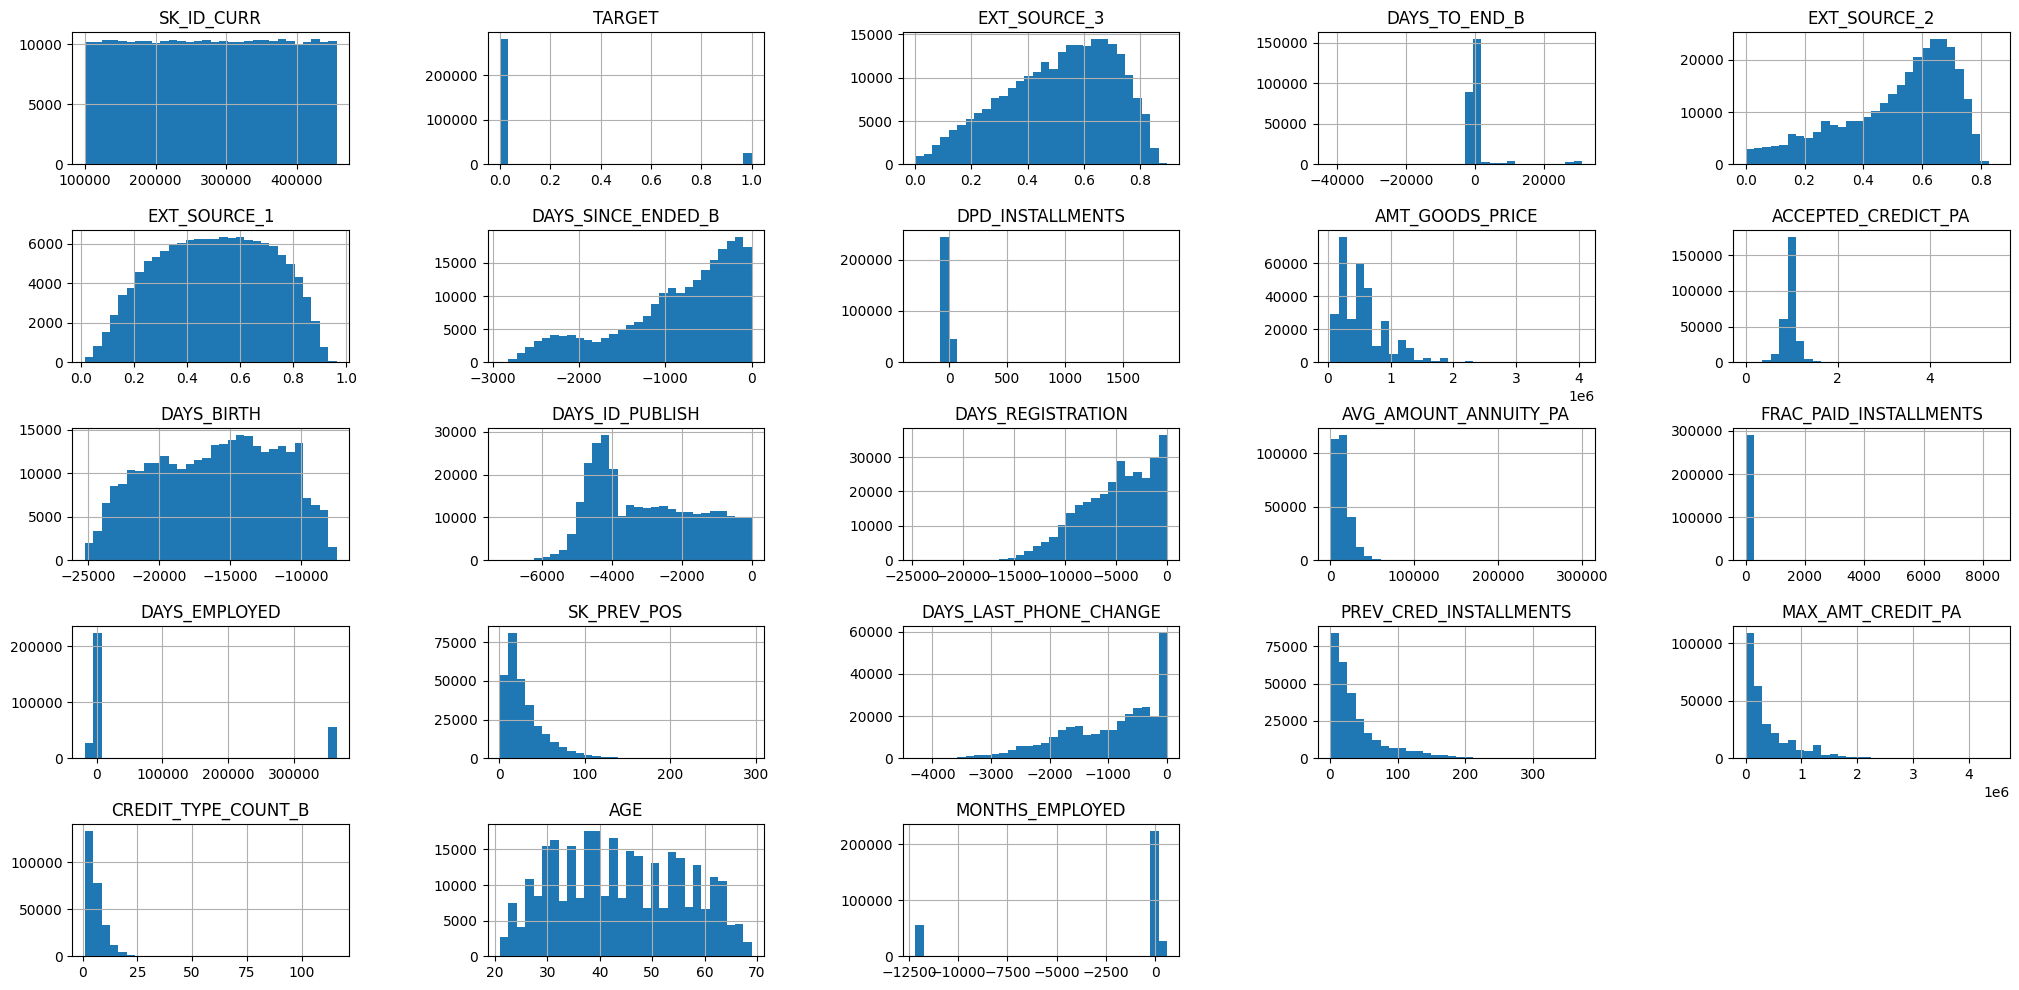

In [15]:
# Numerical Variable
num_attributes = df2.select_dtypes(include=['int64', 'float64'])

ax = num_attributes.hist(bins=30, figsize = (25,12));
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

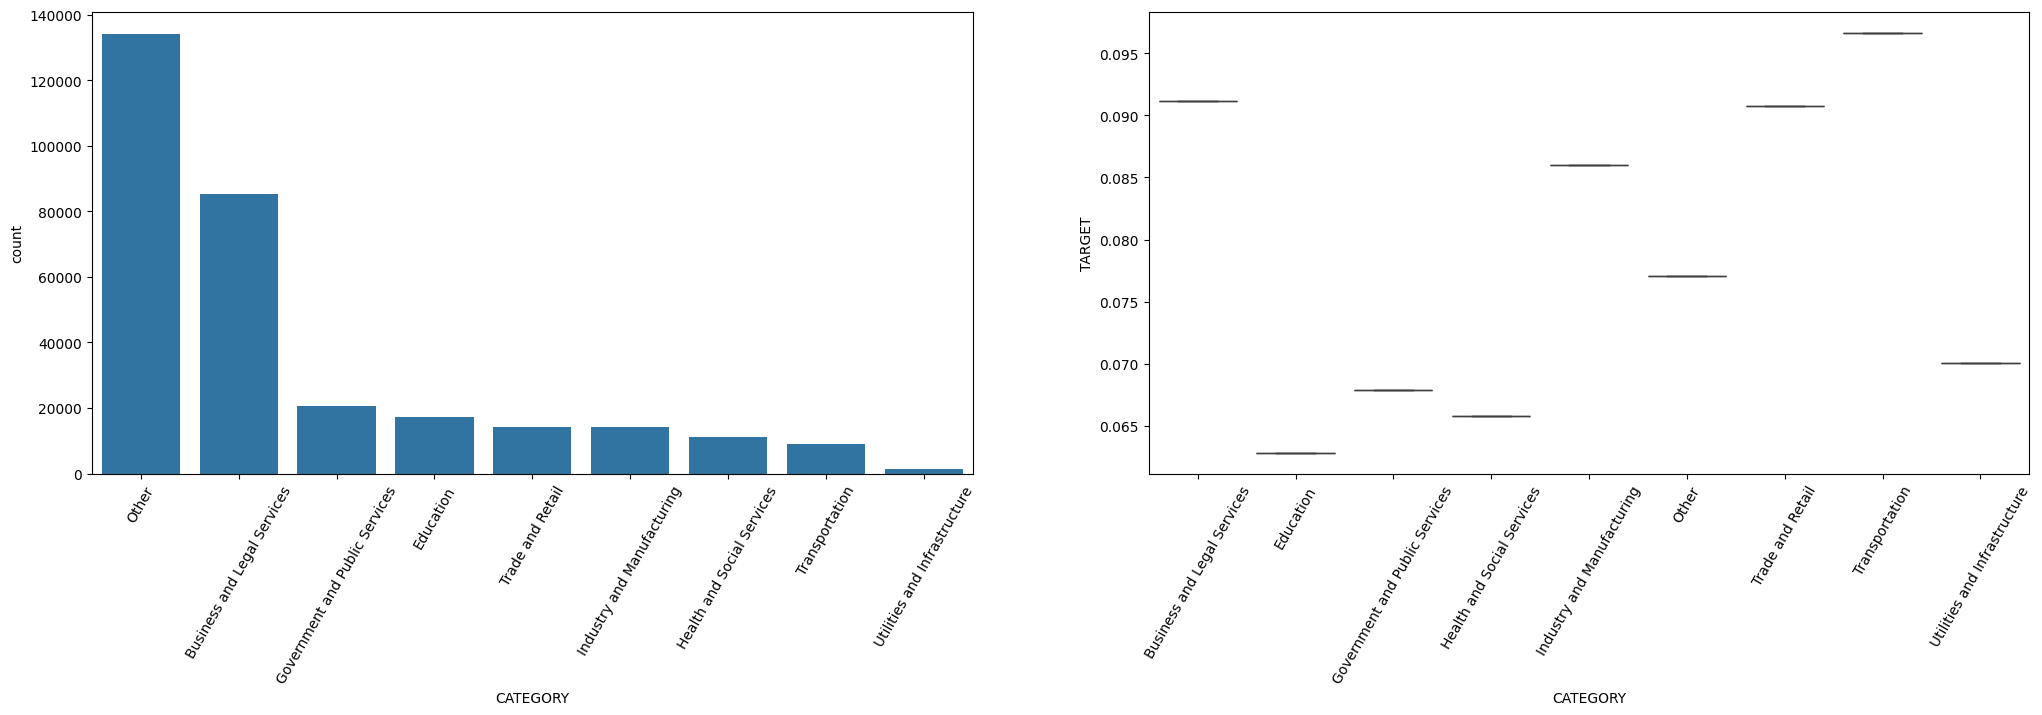

In [265]:
# Categorical Variable
cat_attributes = df2.select_dtypes(exclude=['int64', 'float64'])

plt.figure(figsize=(25,6))

# Category counts
plt.subplot(1,2,1)

sns.countplot(data = cat_attributes,x = 'CATEGORY', order = cat_attributes['CATEGORY'].value_counts().index)
plt.xticks(rotation=60);


# box plot with target
plt.subplot(1,2,2)
aux = df2.groupby('CATEGORY')['TARGET'].mean().reset_index()
sns.boxplot(data = aux, x = 'CATEGORY', y = 'TARGET')
plt.xticks(rotation=60);

## 3.2 Bivariate Analysis

## 3.3 Multivariate analysis

### 3.3.1 Numerical Variables

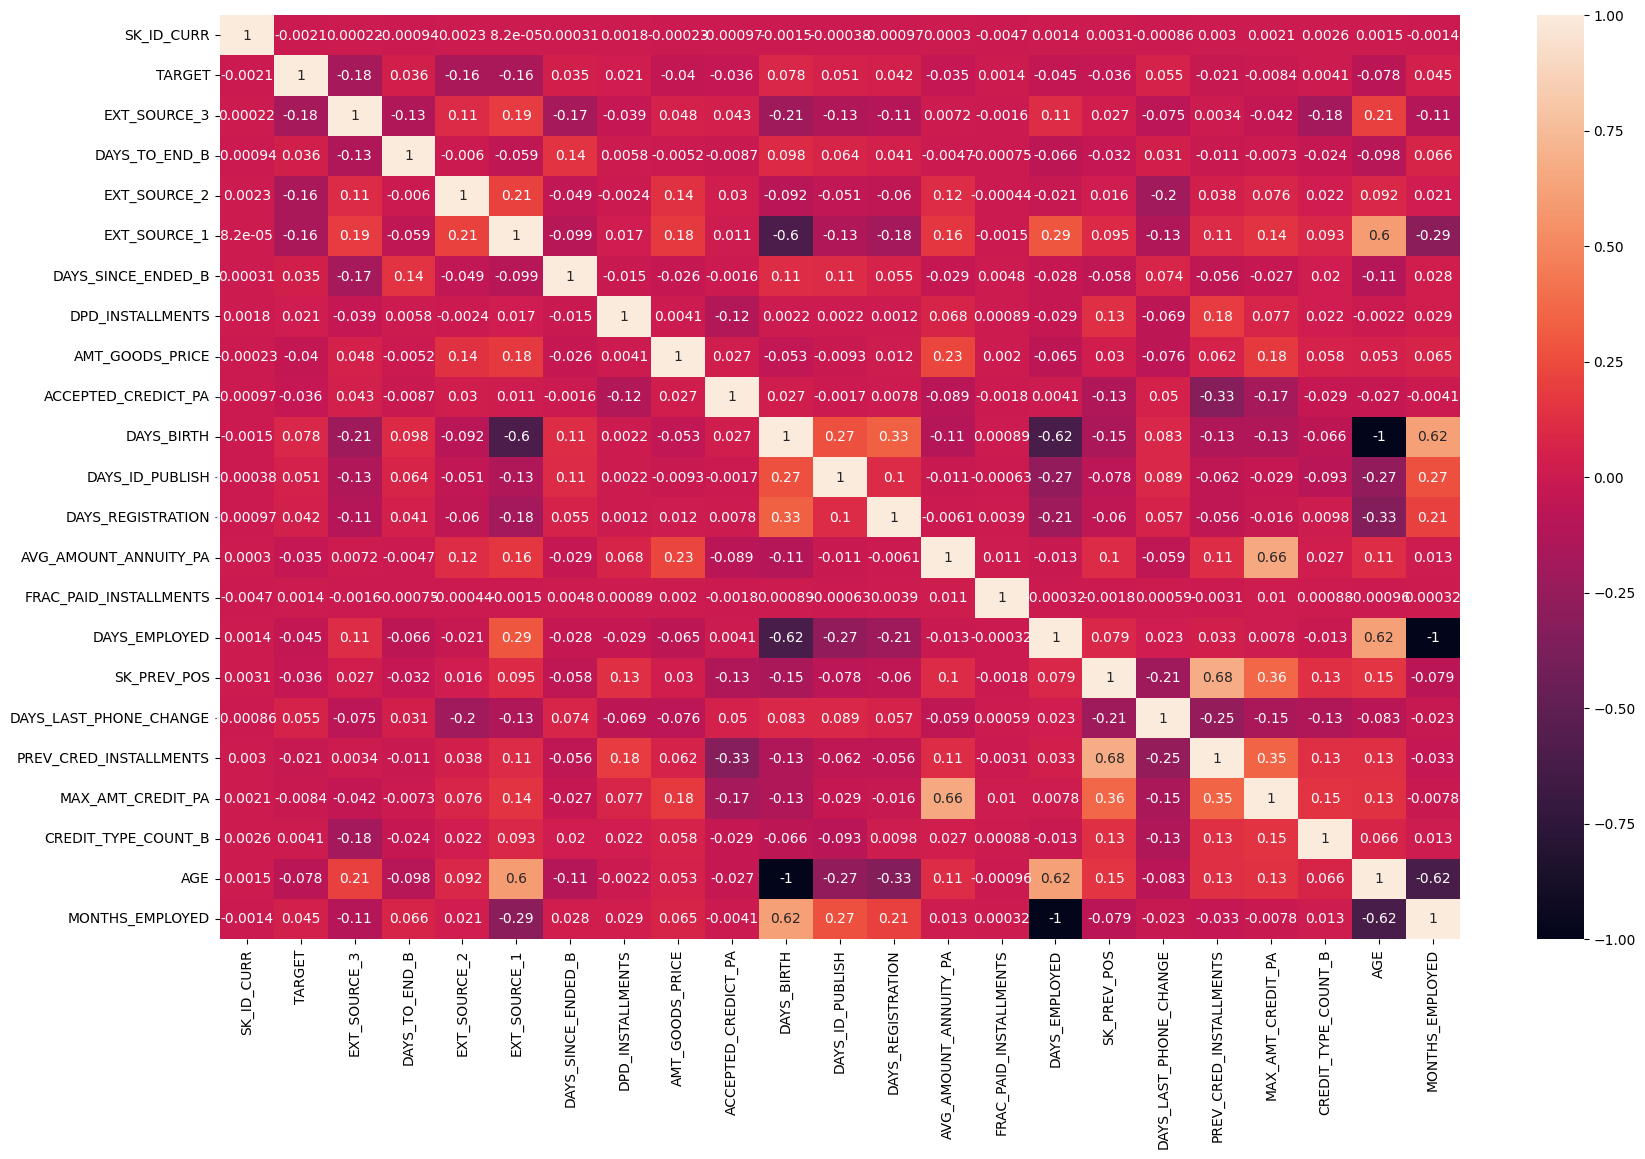

In [17]:
correlation = num_attributes.corr(method='pearson')

plt.figure(figsize=(20,12))
sns.heatmap(correlation, annot=True);

# 4.0 DATA FILTERING

In [18]:
from imblearn.under_sampling import RandomUnderSampler

In [178]:
df4 = df2.copy()

In [233]:
def splitting_data(dataset):

    X = dataset.drop(columns=['TARGET','SK_ID_CURR'])
    y = dataset['TARGET']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Undersampling
    under_sampler = RandomUnderSampler(random_state=42,sampling_strategy=0.3)
    X_train, y_train = under_sampler.fit_resample(X_train, y_train)

    return X_train, X_test, y_train, y_test

In [234]:
X_train, X_test, y_train, y_test = splitting_data(df4)

In [235]:
y_train.value_counts(normalize=True)

TARGET
0    0.769231
1    0.230769
Name: proportion, dtype: float64

# 5.0 DATA PREPROCESSING

In [89]:
import category_encoders as ce
from sklearn.preprocessing import RobustScaler

In [236]:
def preprocess_data(X_test, X_train, y_train,num_attributes):

    X_test_processed = X_test.copy()
    X_train_processed = X_train.copy()

    # Target Encoding for ORGANIZATION_TYPE
    encoder = ce.TargetEncoder()
    X_train_processed['ORGANIZATION_TYPE'] = encoder.fit_transform(X_train_processed['ORGANIZATION_TYPE'], y_train)
    X_test_processed['ORGANIZATION_TYPE'] = encoder.transform(X_test_processed['ORGANIZATION_TYPE'])

    # Target Encoding for CATEGORY
    X_train_processed['CATEGORY'] = encoder.fit_transform(X_train_processed['CATEGORY'], y_train)
    X_test_processed['CATEGORY'] = encoder.transform(X_test_processed['CATEGORY'])

    # Apply Robust Scaler for all numerical variables
    scaler = RobustScaler()
    num_attributes = num_attributes.drop(columns=['TARGET','SK_ID_CURR'])

    X_train_processed[num_attributes.columns] = scaler.fit_transform(X_train_processed[num_attributes.columns])  
    X_test_processed[num_attributes.columns] = scaler.transform(X_test_processed[num_attributes.columns])

    X_train_processed = X_train_processed.drop(columns=['CATEGORY'])
    X_test_processed = X_test_processed.drop(columns=['CATEGORY'])
 


    return X_test_processed, X_train_processed

In [237]:
X_test, X_train = preprocess_data(X_test, X_train, y_train, num_attributes)

# 6.0 FEATURE SELECTION

In [183]:
# X_train = X_train[['EXT_SOURCE_1', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
#        'AVG_AMOUNT_ANNUITY_PA', 'ACCEPTED_CREDICT_PA',
#        'MAX_AMT_CREDIT_PA', 'DAYS_BIRTH', 'SK_PREV_POS',
#        'DPD_INSTALLMENTS', 'FRAC_PAID_INSTALLMENTS', 'DAYS_TO_END_B','AMT_ANNUITY','AMT_CREDIT']]

# X_test = X_test[['EXT_SOURCE_1', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
#        'AVG_AMOUNT_ANNUITY_PA', 'ACCEPTED_CREDICT_PA',
#        'MAX_AMT_CREDIT_PA', 'DAYS_BIRTH', 'SK_PREV_POS',
#        'DPD_INSTALLMENTS', 'FRAC_PAID_INSTALLMENTS', 'DAYS_TO_END_B','AMT_ANNUITY','AMT_CREDIT']]

In [222]:
df_features.name.unique()

array(['EXT_SOURCE_1', 'EXT_SOURCE_3', 'EXT_SOURCE_2',
       'AVG_AMOUNT_ANNUITY_PA', 'MAX_AMT_CREDIT_PA',
       'ACCEPTED_CREDICT_PA', 'SK_PREV_POS', 'DAYS_BIRTH', 'AMT_ANNUITY',
       'FRAC_PAID_INSTALLMENTS', 'AMT_CREDIT', 'DPD_INSTALLMENTS',
       'DAYS_TO_END_B', 'AMT_GOODS_PRICE', 'ORGANIZATION_TYPE',
       'DAYS_ID_PUBLISH', 'PREV_CRED_INSTALLMENTS', 'DAYS_SINCE_ENDED_B',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE',
       'MONTHS_EMPLOYED', 'CREDIT_TYPE_COUNT_B', 'AGE'], dtype=object)

# 7.0 MODEL

Due NaN values, sample size and number of features. The following models will be considered in a first moment:

- XGBoost
- RandomForest
- Light GBM

In [94]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

## 7.1 LightGBM

In [184]:
import lightgbm
import scikitplot as skplt
from sklearn.model_selection import cross_val_score, GridSearchCV

In [256]:
lgb = lightgbm.LGBMClassifier(n_estimators=100, verbose = -1,
                              num_leaves = 31, max_depth = -1, 
                              subsample = 0.8,colsample_bytree = 0.8, learning_rate = 0.1,
                              class_weight={0:1,1:4}, random_state=42)
                              
lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict_proba(X_test)
y_pred_bin = lgb.predict(X_test)

In [257]:
print(classification_report(y_test, y_pred_bin))

              precision    recall  f1-score   support

           0       0.97      0.65      0.78     56538
           1       0.15      0.73      0.26      4965

    accuracy                           0.66     61503
   macro avg       0.56      0.69      0.52     61503
weighted avg       0.90      0.66      0.73     61503



c:\Users\diego\Desktop\Data Science\loan_risk_prediction\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

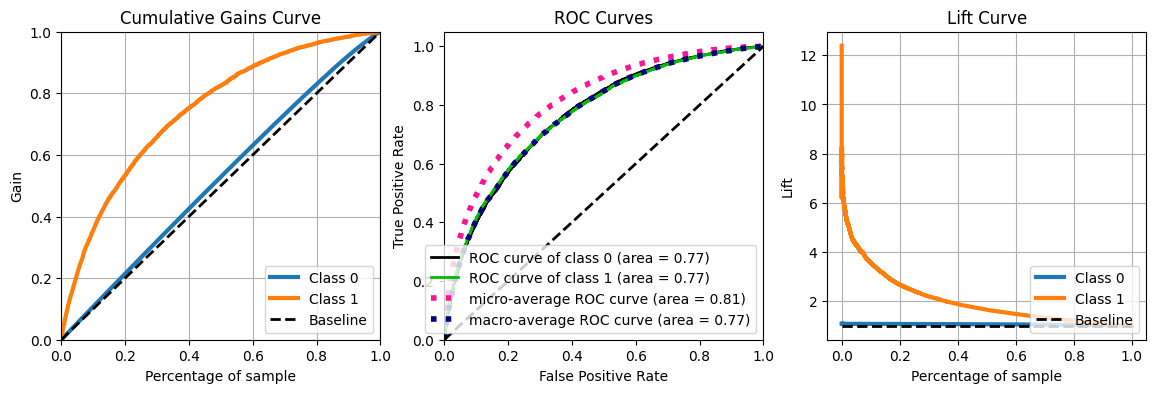

In [255]:
plt.figure(figsize = (14,4))

ax1 = plt.subplot(1,3,1)
skplt.metrics.plot_cumulative_gain(y_true=y_test, y_probas = y_pred_lgb, ax=ax1)
ax2 = plt.subplot(1,3,2)
skplt.metrics.plot_roc_curve(y_true=y_test, y_probas = y_pred_lgb, ax=ax2)
ax3 = plt.subplot(1,3,3)
skplt.metrics.plot_lift_curve(y_true=y_test, y_probas = y_pred_lgb, ax=ax3)

## 7.2 Decision Tree Classifier

In [258]:
from sklearn.tree import DecisionTreeClassifier

In [259]:
dt = DecisionTreeClassifier(random_state=42, class_weight={0:1,1:4})
dt.fit(X_train, X_test)
y_proba_dt = dt.predict_proba(X_test)
y_pred_dt = dt.predict(X_test)

ValueError: Input y contains NaN.

## .0 CROSS-VALIDATION

In [249]:
# Lista de métricas a serem validadas
metrics = ['roc_auc','recall','precision']

# Model validation using k-fold cross-validation
for metric in metrics:
    scores = cross_val_score(lgb, X_train, y_train, cv=5, scoring=metric)
    print(f'{metric} Médio: {scores.mean():.4f}, Desvio Padrão: {scores.std():.4f}')

roc_auc Médio: 0.7598, Desvio Padrão: 0.0048
recall Médio: 0.6430, Desvio Padrão: 0.0078
precision Médio: 0.4291, Desvio Padrão: 0.0049


In [ ]:
param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}
grid = GridSearchCV(estimator=lgb, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1)
grid_result = grid.fit(X_train, y_train)
# Resultados
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

<Axes: xlabel='importance', ylabel='name'>

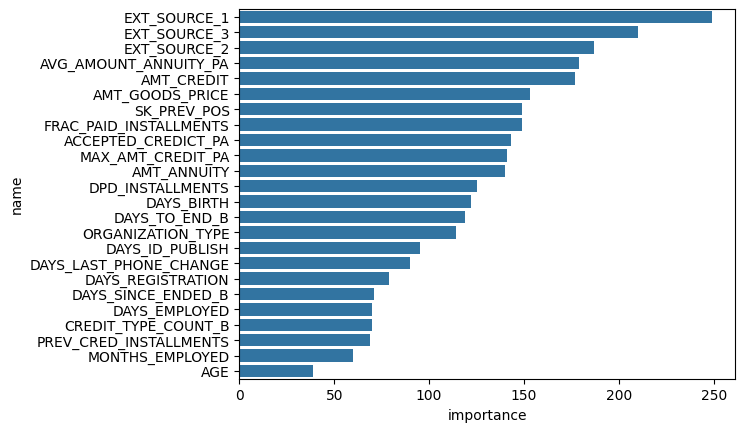

In [246]:
df_features = pd.DataFrame({'importance': lgb.feature_importances_, 'name': lgb.feature_name_})
df_features = df_features.sort_values(by='importance', ascending=False)

sns.barplot(data=df_features, x='importance', y='name')